<h2> K.Means Algorithm </h2>

Clustering is a different branch of Machine Learning in general that falls under unsupervised learning where labels are not present in the dataset and a pattern of similarly identifiable datapoints are considered as new clusters/classes purely on the basis of datapoints similarity with each other



<h3> 0. Inslalling Dependencies </h3>

In [1]:
!pip install pandas 
!pip install numpy 
!pip install matplotlib
!pip install -U scikit-learn

<h3>1. Importing Dependencies </h3>

In [2]:
import pandas as pd 
from sklearn.cluster import KMeans
import numpy as np 
import os
import matplotlib.colors as mcl
import random
import matplotlib.pyplot as plt

<h3>2. Creating Dataset </h3>

Today lets work on an exercise to have N number of students whose name will be provided by user and we will create numpy array  and dataframe over it(DataFrame for better visualization and Numpy for clustering purpose) with random marks assigned for 2 subjects (for 2D clustering visualization ) and 3 subjects (for 3D clustering and visualizations)

In [3]:
def get_dimension():
    while True:
        dimension=int(input('Enter 2 for 2 Dimension and 3 for 3 Dimensions: '))
        if dimension==2 or dimension==3: 
            break 
        else: 
            print('Creator\'s note Please give 2 or 3 as input as it works on these 2 only (for now) \n')

    return dimension

def get_topics(dimension):
    topics=[]
    if dimension==2:
        topics=['Math','Science']
    else: 
        topics=['Math','Science','Literature']
    
    return topics

def get_students(number_of_students):
    students=[]
    for i in range(0,number_of_students):
        students.append(input(f'Enter name of the {i+1} student:  '))
    return students

def get_column_names(topics):
    columns=['Student']
    for i in topics: 
        columns.append(i)
    return columns

def get_initial_data_frame(students,columns):
    df=pd.DataFrame(columns=columns)
    df['Student']=students
    for i in columns[1:]: 
        df[i]=[random.randrange(30,100) for number in range(len(students))]
    return df


def get_data_frame(number_of_students,dimension):
    topics=get_topics(dimension)
    students=get_students(number_of_students)
    columns=get_column_names(topics)
    data_df=get_initial_data_frame(students,columns)
    return data_df
    

def saving_dataframe_and_loading_latest_dataframe(data_df):
        
    if len(data_df.columns)==3:
        print('Saving to \'Dataset 2D\'')
        if 'Dataset_2D.csv' in os.listdir(os.getcwd()):
            data_df.to_csv('Dataset_2D.csv',mode='a',index=False,header=False)
        else: 
            data_df.to_csv('Dataset_2D.csv',mode='a',index=False,header=True)

        data_df=pd.read_csv('Dataset_2D.csv')

    else: 
        print('Saving to \'Dataset 2D\'')
        if "Dataset_3D.csv" in os.listdir(os.getcwd()):
            data_df.to_csv('Dataset_3D.csv',mode='a',index=False,header=False)
        else:
            data_df.to_csv('Dataset_3D.csv',mode='a',index=False,header=True)

        data_df=pd.read_csv('Dataset_3D.csv')
    
    return data_df
    
    

<h4> Calling all functions </h4>
<ol>
    <li> We input the dimensions of the data (2D or 3D) </li>
    <li> We get number of students </li>
    <li> We get dataframes </li>
    <li> We dump dataframe and load the entire data frame </li>
    <li> We get numpy array </li>
</ol>

In [4]:
dimension=get_dimension()
number_of_students=int(input('Enter number of students to work with: '))

data_df=get_data_frame(number_of_students,dimension)
data_df=saving_dataframe_and_loading_latest_dataframe(data_df)

print('Numpy array: ')
data_np=(data_df.drop(columns=['Student'])).to_numpy()
print(data_np)
print('Data Frame: ')
data_df



Enter 2 for 2 Dimension and 3 for 3 Dimensions: 2
Enter number of students to work with: 0
Saving to 'Dataset 2D'
Numpy array: 
[[81 82]
 [98 84]
 [46 98]
 [71 76]
 [54 81]
 [75 97]
 [62 68]
 [56 36]
 [61 46]
 [98 97]
 [59 92]
 [41 56]
 [80 48]
 [70 75]
 [80 59]
 [55 97]
 [57 69]
 [32 47]
 [59 42]
 [66 96]
 [32 68]
 [64 50]
 [35 34]
 [39 80]
 [75 99]
 [92 75]
 [49 92]
 [71 35]
 [75 35]
 [68 39]
 [31 51]]
Data Frame: 


,Student,Math,Science
0,Siddhant,81,82
1,Prakash,98,84
2,Prashant,46,98
3,Pradeep,71,76
4,Prashidhi,54,81
5,Prakriti,75,97
6,Sudeep,62,68
7,Sandeep,56,36
8,Sarkar,61,46
9,Pukar,98,97


<h3>3. K means clustering </h3>

In [5]:
clustering_model=KMeans(n_clusters=5).fit(data_np)
cluster_op=clustering_model.predict(data_np)
data_df['Clusters']=cluster_op
data_df.to_csv('output.csv',index=False)

C:\Users\FM-PC-LT-233\anaconda3\envs\training_\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<h3> 4. Plotting Cluster Graphs</h3>
Now we will plots the clusters at with different colors 

In [6]:
def plot_all(topics,data_df,color_list,flag):
    if flag==3:
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
    
    for i in range(data_df.shape[0]):
        c=data_df.at[i,'Clusters']
        x_pt=data_df.at[i,topics[0]]
        y_pt=data_df.at[i,topics[1]]
        if flag==3:
            z_pt=data_df.at[i,topics[2]]
            ax.scatter(x_pt,y_pt,z_pt,color=color_list[c])
        else: 
            plt.scatter(x=x_pt,y=y_pt,color=color_list[c])
    

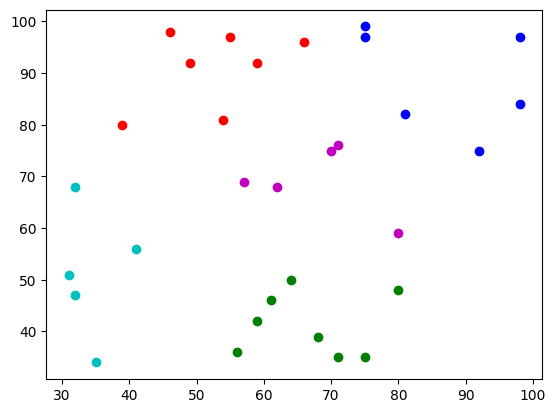

In [7]:
topics=get_topics(len(data_df.columns)-2)
color_list=list(mcl.BASE_COLORS.values())


if len(topics)==3:
    plot_all(topics,data_df,color_list,3)
else: 
    plot_all(topics,data_df,color_list,2)



<h3> How to chose Proper 'K' </h3>

So now that we have built the system and it works how do we chose the correct number of clusters ?

<h3> Elbow Method </h3>

In this method we calculate the within CLuster sum of squares with respect to number of clusters chosen and with that we plot the graph with each change and get a graph similar to that of a elbow which has a sharp turn and stable WCSS after that. The point from which their is very small change in the WCSS is taken as the final number of clusters 

<h4> Within cluster sum of squares (WCSS) </h4>
This is computed as: 
<img src='https://149695847.v2.pressablecdn.com/wp-content/uploads/2019/08/4_wcss.png'>

<h4> Obtained Graph elbow method </h4>
<img src='https://editor.analyticsvidhya.com/uploads/43191elbow_img%20(1).png'>


3810.246428571428


C:\Users\FM-PC-LT-233\anaconda3\envs\training_\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FM-PC-LT-233\anaconda3\envs\training_\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FM-PC-LT-233\anaconda3\envs\training_\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\FM-PC-LT-233\anaconda3\envs\training_\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppre

[25650.258064516125, 12599.936974789915, 8494.305555555555, 5225.564646464647, 3810.246428571428, 2985.925, 2480.421428571429]


C:\Users\FM-PC-LT-233\anaconda3\envs\training_\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'WCSS')

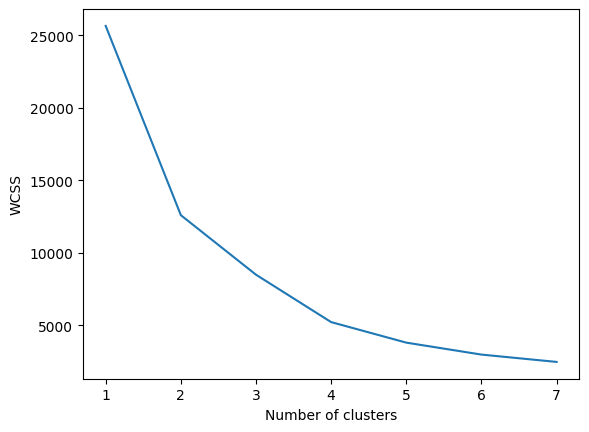

In [22]:
print(clustering_model.inertia_)
wcss=[(KMeans(i).fit(data_np)).inertia_ for i in range(1,8)]
print(wcss)
n_cluster=[i for i in range(1,8)]

plt.plot(n_cluster,wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


<b> From the graph obtained above we can conclude that 5 is the best number of clusters for this 2D dataset </b> 